In [17]:
from sklearn.datasets import load_wine
import pandas as pd

# Wine 데이터셋 로드
wine = load_wine()

# DataFrame으로 변환
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['target'] = wine.target  # 타겟 열 추가

# 타겟 값을 이름으로 변환 (0, 1, 2 -> 와인 종류)
df['target'] = df['target'].map({0: 'class_0', 1: 'class_1', 2: 'class_2'})

# 데이터 확인
df.head()

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline   target  
0                          3.92   1065.0  class_0  
1                          3.40   1050.0  class_0  
2                          3.17   1185.0  class_0  
3                          3.45   1480.0  class_0  
4                          2.93    735.0  class_0

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [19]:
df.describe()

alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.980000    0.340000              0.130000         0.410000   
25%         1.742500    1.205000              0.270000         1.250000   
50%         2.355000    2.135000              0.340000         1.555000   
75%         2.800000    2.875000              0.437500         1.950000   
max         3.880000    5.080000              0.660000         3.580000   

       color_intensity         hue  od280/od315_of_diluted_wines      proline  
count       178.000000  178.000000                    178.000000   178.000000  
mean          5.058090    0.957449                      2.611685   746.893258  
std           2.318286    0.228572                      0.709990   314.907474  
min           1.280000    0.480000                      1.270000   278.000000  
25%           3.220000    0.782500                      1.937500   500.500000  
50%           4.690000    0.965000                      2.780000   673.500000  
75%           6.200000    1.120000                      3.170000   985.000000  
max          13.000000    1.710000                      4.000000  1680.000000

array([[<Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'malic_acid'}>,
        <Axes: title={'center': 'ash'}>,
        <Axes: title={'center': 'alcalinity_of_ash'}>],
       [<Axes: title={'center': 'magnesium'}>,
        <Axes: title={'center': 'total_phenols'}>,
        <Axes: title={'center': 'flavanoids'}>,
        <Axes: title={'center': 'nonflavanoid_phenols'}>],
       [<Axes: title={'center': 'proanthocyanins'}>,
        <Axes: title={'center': 'color_intensity'}>,
        <Axes: title={'center': 'hue'}>,
        <Axes: title={'center': 'od280/od315_of_diluted_wines'}>],
       [<Axes: title={'center': 'proline'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

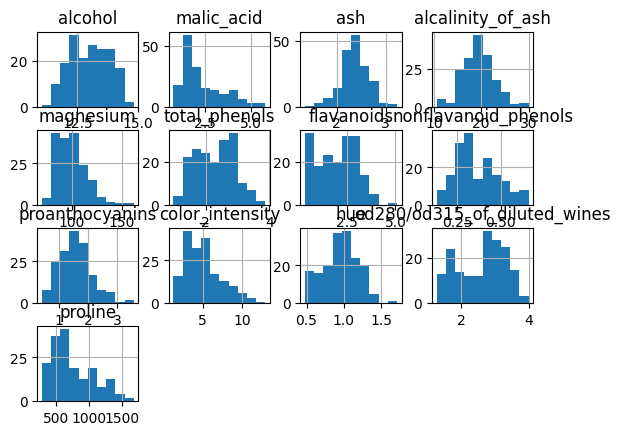

In [20]:
df.hist()

<Axes: >

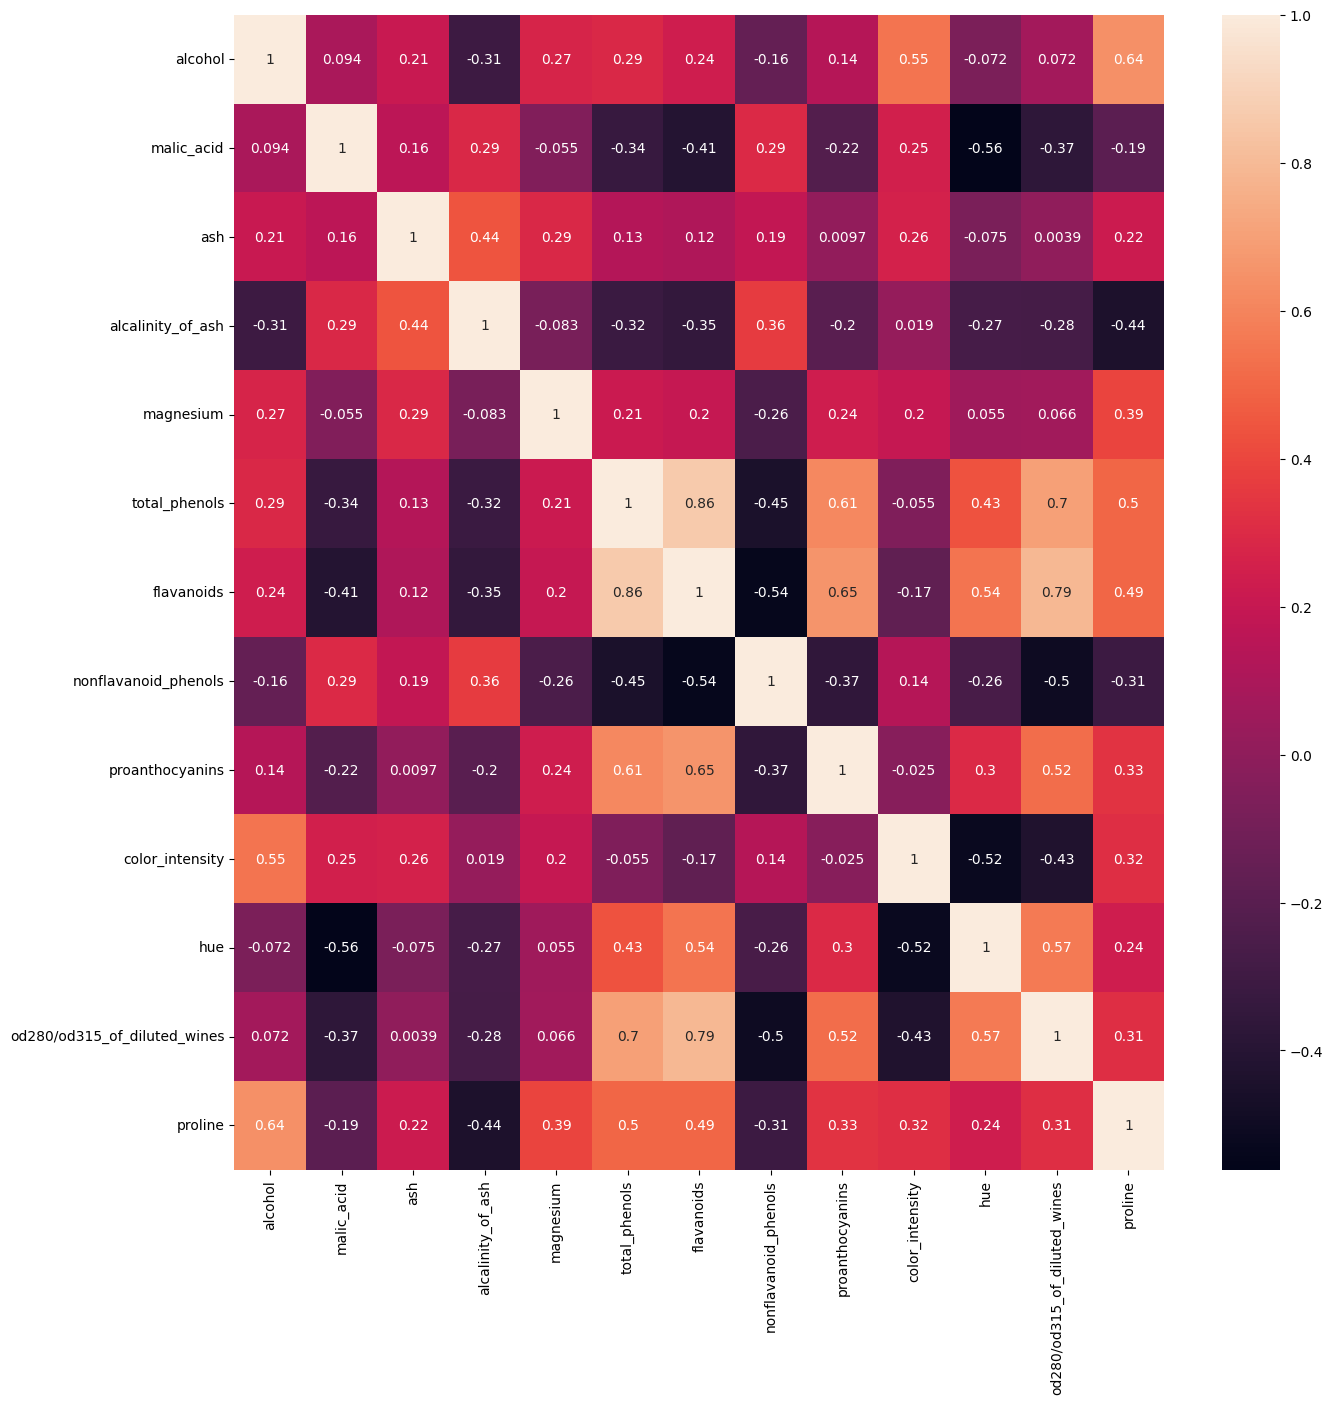

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
df_numerical = df.drop('target', axis = True).corr()
plt.figure(figsize=(15,15))
sns.heatmap(df_numerical, annot=True)

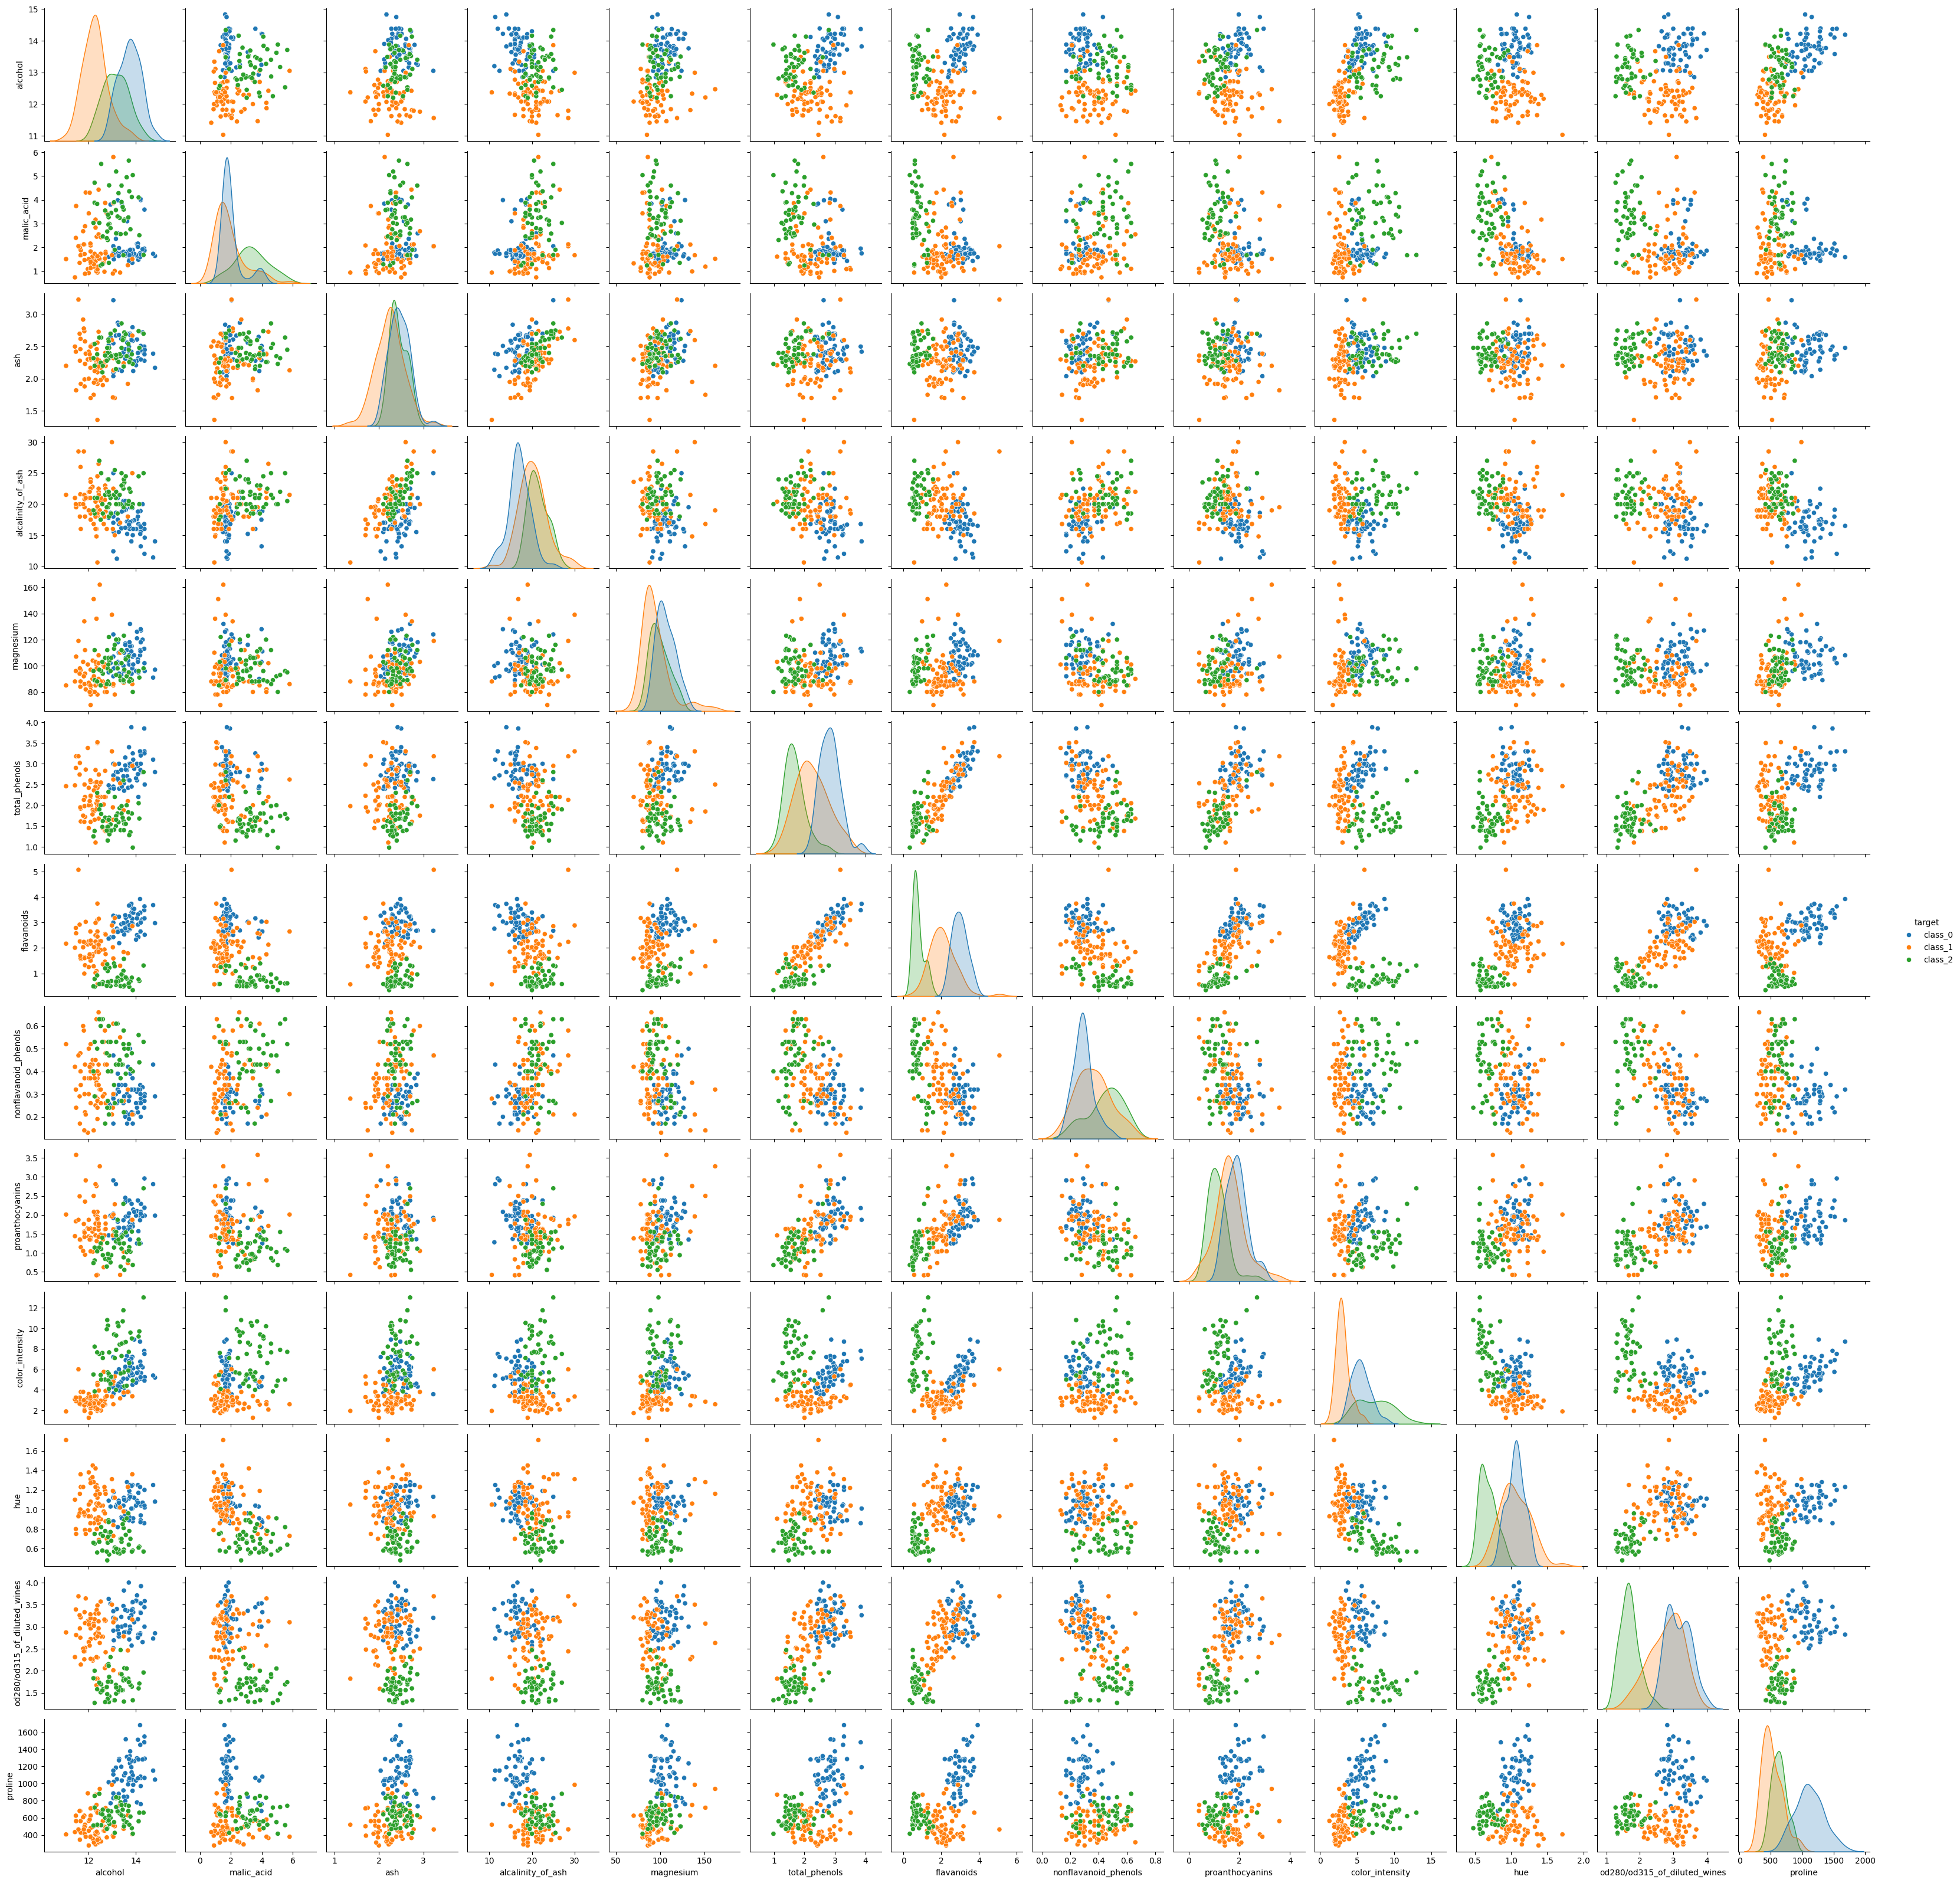

In [11]:
sns.pairplot(df, hue='target')

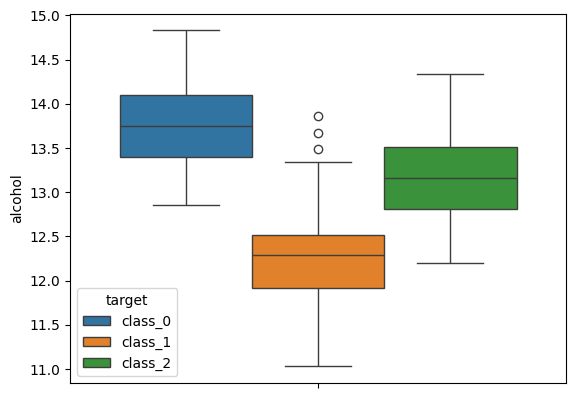

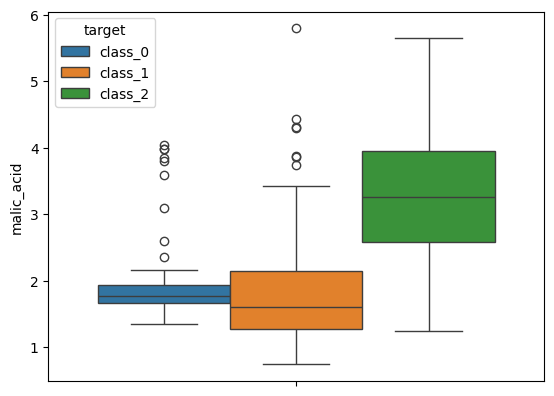

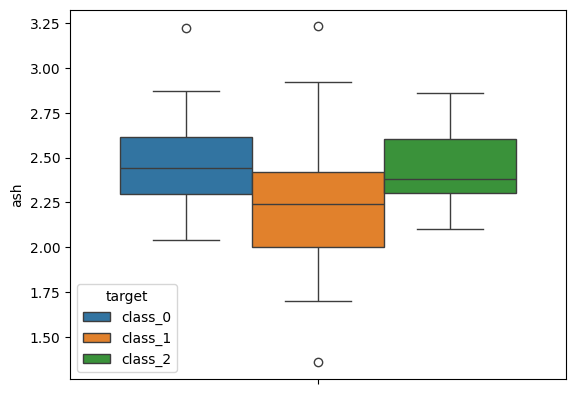

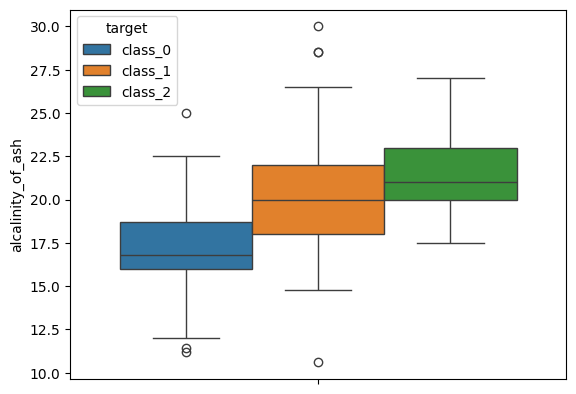

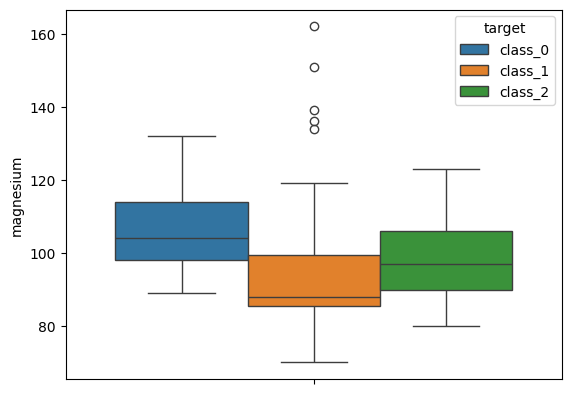

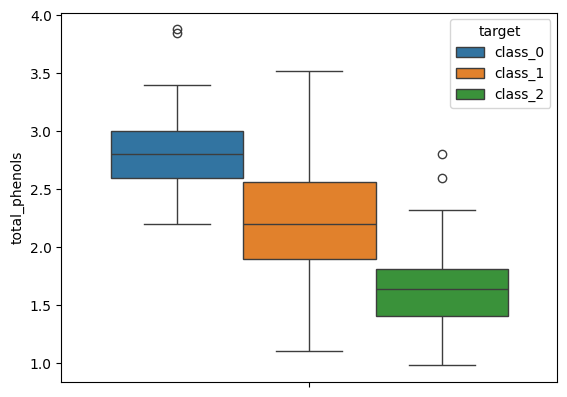

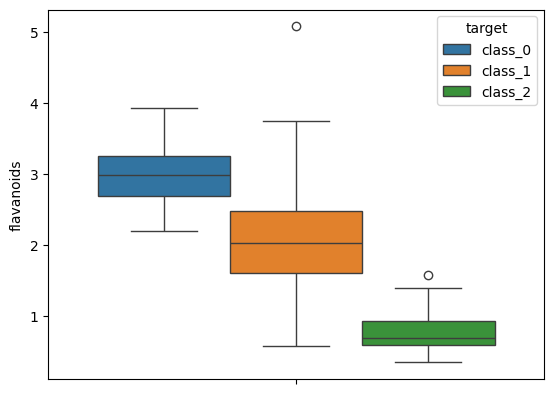

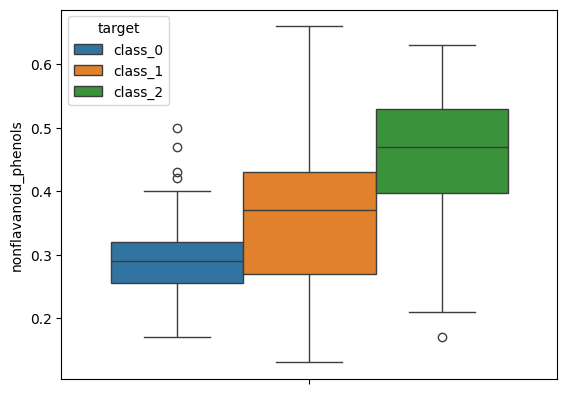

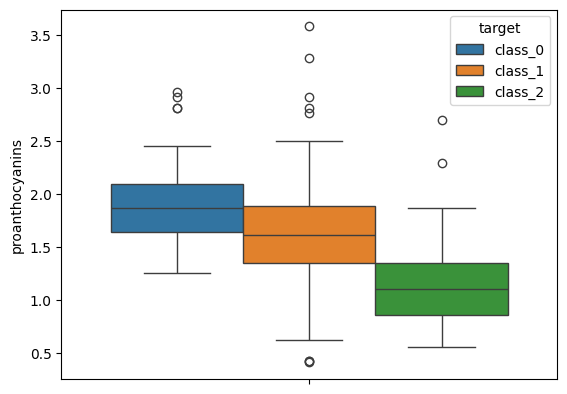

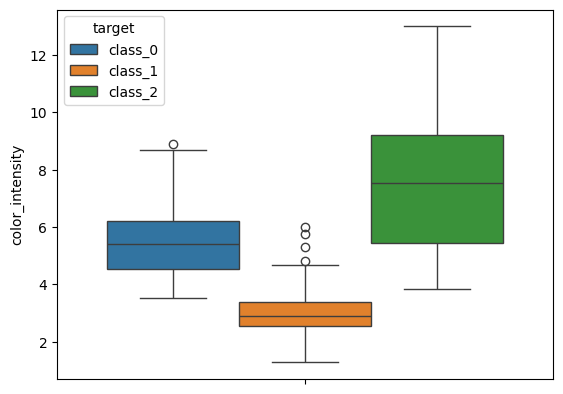

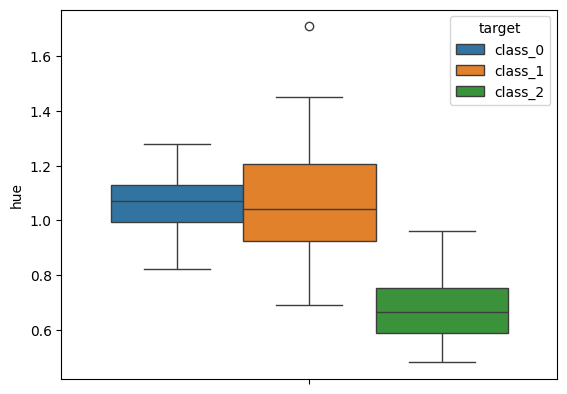

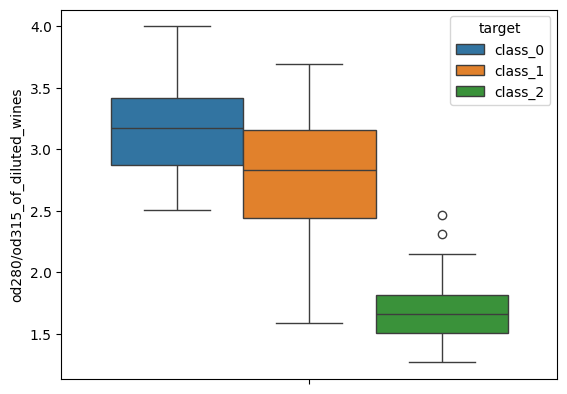

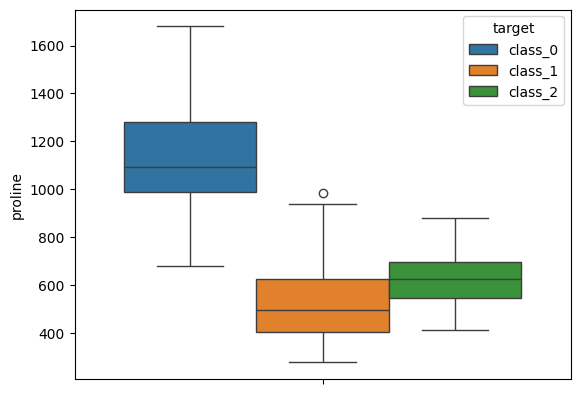

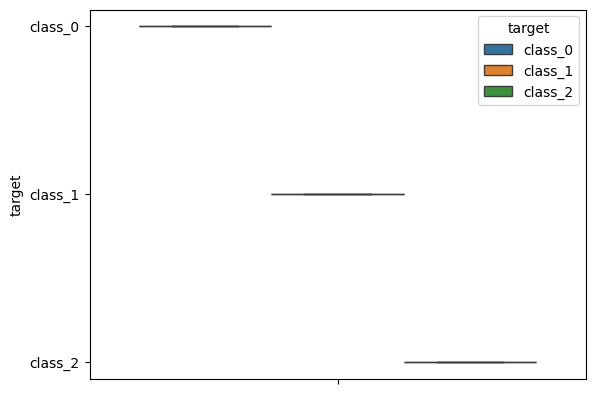

In [13]:
for col in df.columns:
    sns.boxplot(y= col, hue = 'target', data = df)
    plt.show()

In [25]:

for col in df.select_dtypes(include=['float', 'int']).columns:# 이상치 제거
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3-q1
    low = q1-1.5*iqr
    high = q3+1.5*iqr
    df[col] = df[col].apply(lambda x : x if low <= x <= high else (df[col].mean()))

# col의 평균 값 계산
# mean_value = df[col].mean()

# # 이상치 값을 평균으로 대체
# df[col] = df[col].apply(lambda x: mean_value if x < low or x > high else x)

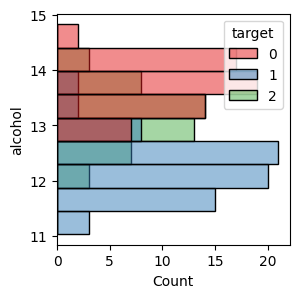

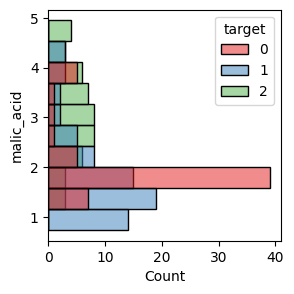

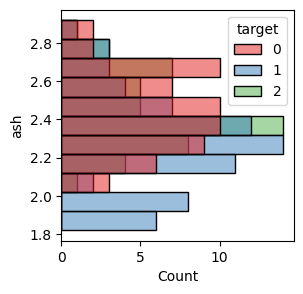

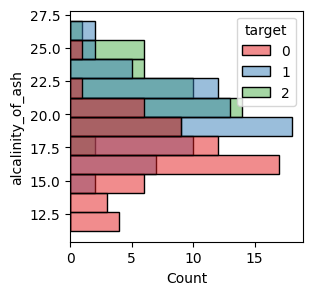

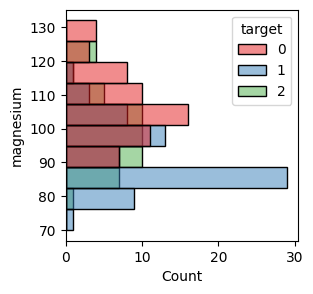

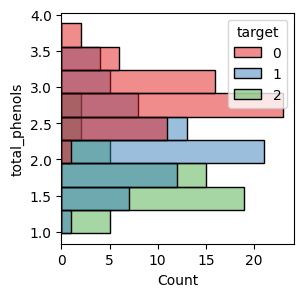

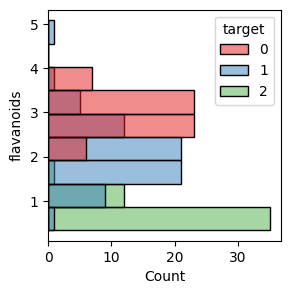

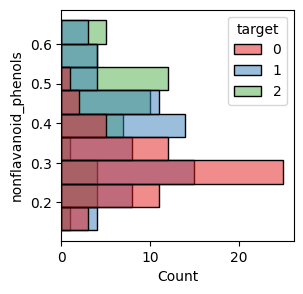

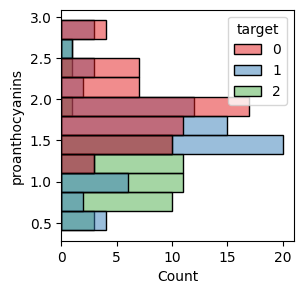

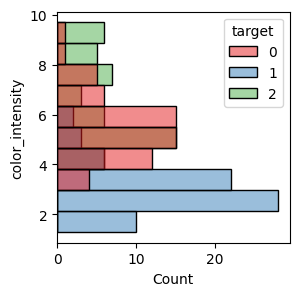

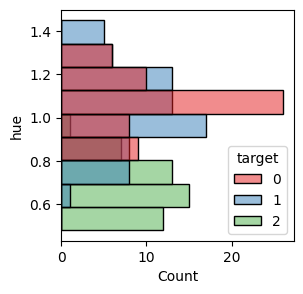

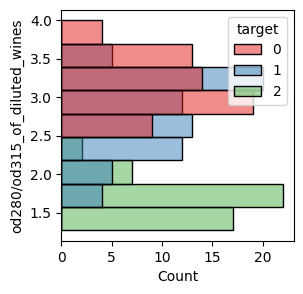

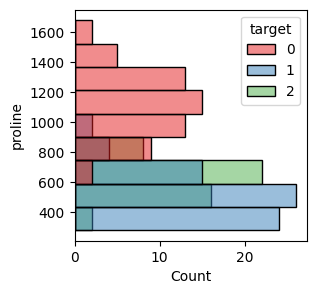

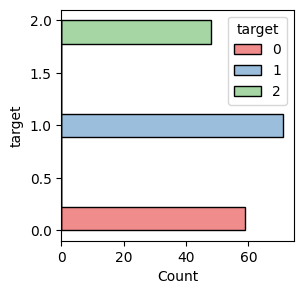

In [45]:
for col in df.columns:
    plt.figure(figsize=(3,3))
    sns.histplot(y= col, hue = 'target', data = df, palette='Set1')
    plt.show()

In [29]:
# 전처리 끝, 레이블 인코딩 필요없음, 표준화만 진행하자
df['target'] = df['target'].map({'class_0': 0, 'class_1' : 1, 'class_2' : 2})
df['target']

0      0
1      0
2      0
3      0
4      0
      ..
173    2
174    2
175    2
176    2
177    2
Name: target, Length: 178, dtype: int64

In [30]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
scaler = StandardScaler()
X = df.drop('target', axis = 1)
y = df['target']
X = scaler.fit_transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMClassifier
from lightgbm import LGBMRegressor
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(acc)

0.9722222222222222


In [34]:
from sklearn.model_selection import GridSearchCV
gb = GradientBoostingClassifier()
lgbm = LGBMClassifier()
models = [
    ('rf', rf, {'n_estimators' : [1], 'max_depth' : [1]}),
    ('gb', gb, {'n_estimators' : [1], 'max_depth' : [1], 'min_samples_split' : [3, 6]}),
    ('lgbm', lgbm, {'n_estimators' : [1], 'max_depth' : [1], 'learning_rate': [0.1]}),
]
best_models = {}
for modelname, model, param in models:
    gscv = GridSearchCV(estimator=model, param_grid=param, cv=3, n_jobs=1, verbose=1)
    gscv.fit(X_train, y_train)
    print(modelname, gscv.best_score_)
    print(modelname, gscv.best_params_)
    best_models[modelname] = gscv.best_estimator_


Fitting 3 folds for each of 1 candidates, totalling 3 fits
rf 0.5842198581560284
rf {'max_depth': 1, 'n_estimators': 1}
Fitting 3 folds for each of 2 candidates, totalling 6 fits
gb 0.6549940898345153
gb {'max_depth': 1, 'min_samples_split': 3, 'n_estimators': 1}
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000236 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 367
[LightGBM] [Info] Number of data points in the train set: 94, number of used features: 13
[LightGBM] [Info] Start training from score -1.142097
[LightGBM] [Info] Start training from score -0.905709
[LightGBM] [Info] Start training from score -1.285198
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Ligh

In [35]:
best_model = best_models['gb']
print(best_model)

GradientBoostingClassifier(max_depth=1, min_samples_split=3, n_estimators=1)


In [41]:
from sklearn.ensemble import VotingClassifier
estimators = [ #튜플을 담은 리스트 자료구조 ('이름', 모델)
    ('gb', best_models['gb']),
    ('rf', best_models['rf']),
    ('lgbm', best_models['lgbm'])
]
voting_cls = VotingClassifier(estimators=estimators, voting='soft')
voting_cls.fit(X_train, y_train)
y_pred = voting_cls.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(acc)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000211 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 509
[LightGBM] [Info] Number of data points in the train set: 142, number of used features: 13
[LightGBM] [Info] Start training from score -1.149165
[LightGBM] [Info] Start training from score -0.912776
[LightGBM] [Info] Start training from score -1.266948
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
0.8888888888888888


In [3]:
import pandas as pd

# 예시 데이터프레임
data = {
    'userid': ['user1', 'user2', 'user1', 'user2', 'user3', 'user4', 'user1', 'user2'],
    'timestamp': [
        '2023-05-01', '2023-05-15', '2023-05-10', '2023-06-20', '2023-07-05', 
        '2023-07-25', '2023-08-15', '2023-09-10'
    ]
}
df = pd.DataFrame(data)
df['timestamp'] = pd.to_datetime(df['timestamp'])


In [5]:

# 5월부터 9월까지 해당하는 월을 추출
df = df[df['timestamp'].dt.month.isin([5, 6, 7, 8, 9])]
df

userid  timestamp
0  user1 2023-05-01
1  user2 2023-05-15
2  user1 2023-05-10
3  user2 2023-06-20
4  user3 2023-07-05
5  user4 2023-07-25
6  user1 2023-08-15
7  user2 2023-09-10

In [9]:
df.groupby([df['timestamp'].dt.month, 'userid']).size()

timestamp  userid
5          user1     2
           user2     1
6          user2     1
7          user3     1
           user4     1
8          user1     1
9          user2     1
dtype: int64

In [10]:

# 각 월별로 userid의 timestamp 기록 수를 계산
mau_counts = df.groupby([df['timestamp'].dt.month, 'userid']).size().reset_index(name='count')
mau_counts

timestamp userid  count
0          5  user1      2
1          5  user2      1
2          6  user2      1
3          7  user3      1
4          7  user4      1
5          8  user1      1
6          9  user2      1

In [11]:

# 월별로 timestamp 기록이 2회 이상인 userid를 필터링
mau_counts = mau_counts[mau_counts['count'] >= 2]
print(mau_counts)

# 각 월별 MAU 계산
monthly_mau = mau_counts.groupby('timestamp')['userid'].nunique().reset_index(name='MAU')

print(monthly_mau)

   timestamp userid  count
0          5  user1      2
   timestamp  MAU
0          5    1
